
# IPAN - ImageJ Processing Assistant Notebook

## 01 - Working with ImageJ pt.1
**Install PyimageJ, run Macros commands, file input/output**

### Import libraries and packages 

In [1]:
import scyjava as sj              # {optional} Set memory pool
from skimage import io            # ImageJ opener, open the image on the background ImageJ
from IPython.display import Image # Display only images
import os                         # Used to manipulate and create directory with python. 

***
### Install PyimageJ
PyimageJ is required to run this notebook, if it is not install yet, proceed and install it. <br> The PyimageJ documentation, available [here](https://github.com/imagej/pyimagej/blob/master/doc/Install.md), shows multiple example for the installation. The suggested option is to install it locally on a conda environment "pyimagej" where to install the multiple packages used in the following notebooks and analysis. 

The *Image()* single-command way to display an image on the jupyter notebook.

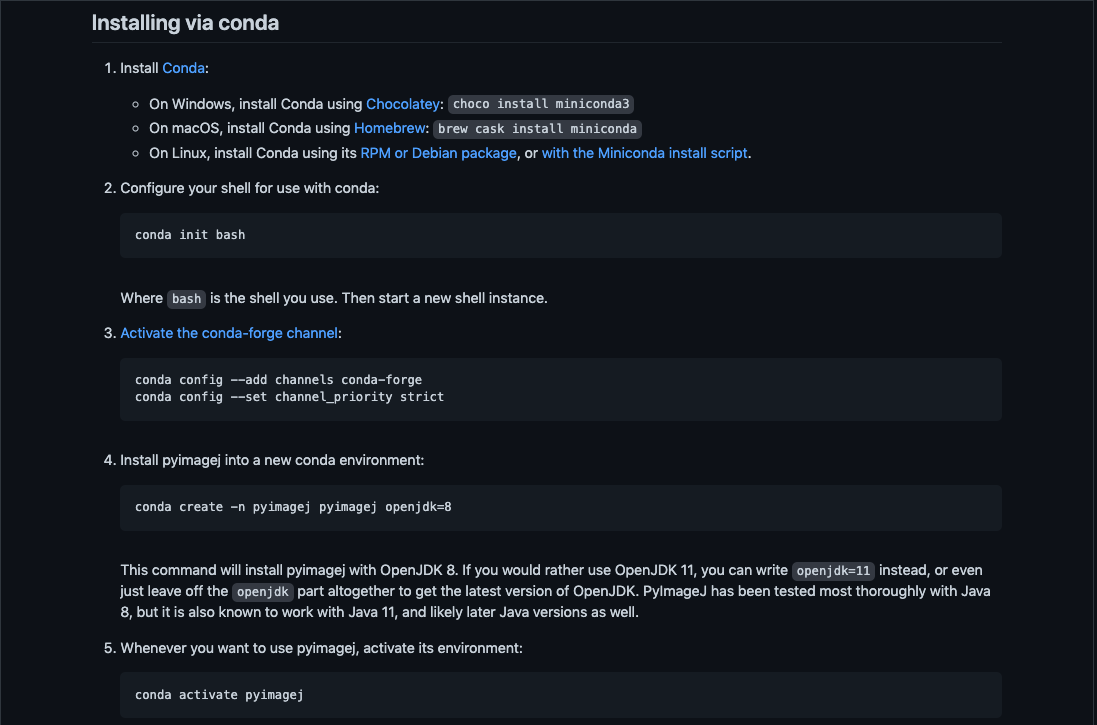

In [2]:
Image("FIGURES/F01-Install_PyImageJ.png")

➚ Figure01-Install_PyImageJ

***

### Import ImageJ

The initialization of imagej in the notebook is explained in the example initiatlisation notebook provided with the PyImageJ documentation [here](https://github.com/imagej/pyimagej/blob/master/doc/Initialization.md). The different option are also explained with multiple examples in the code snippet notebook of PyimageJ [here](https://github.com/imagej/pyimagej/blob/master/doc/PyImageJ-Code-Snippets.ipynb).
The first step is to import and initialize imageJ. <br> We can optionally chose to set the maximum size in bytes of the memory of the allocation pool with the *sj.config.add_options(-Xm2g)* command, in this case 2g = 2 Gygabytes. 

In [3]:
#sj.config.add_options('-Xmx2g') # <--- Example: set 2G memory.
import imagej
ij = imagej.init() #In this way, the LATEST online version of the software is imported

#Print imageJ version
print("The actual version of ImageJ is:", ij.getApp().getInfo(True))

log4j:WARN No appenders could be found for logger (org.bushe.swing.event.EventService).
log4j:WARN Please initialize the log4j system properly.
log4j:WARN See http://logging.apache.org/log4j/1.2/faq.html#noconfig for more info.


The actual version of ImageJ is: ImageJ2 2.3.0/1.53f; Java 1.8.0_302 [x86_64]; 41MB of 910MB


***

### Open, save and show images
Open a LOCAL and a WEB example images with the *ij.io.open()* imageJ opener command. This function **open** an image from the web (url) or from a a local repository (pathfile) and **assign** it to a variable. Use the the *show()* command to display the image to the screen.

[INFO] Populating metadata


[java.lang.Enum.toString] [INFO] Populating metadata


[INFO] Populating metadata


[java.lang.Enum.toString] [INFO] Populating metadata


[INFO] Populating metadata


[java.lang.Enum.toString] [INFO] Populating metadata


<java class 'net.imagej.DefaultDataset'> 
Local Image:



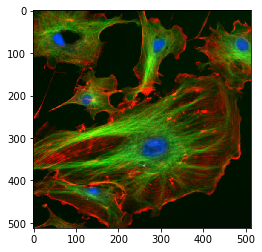

<java class 'net.imagej.DefaultDataset'> 
Web Image:



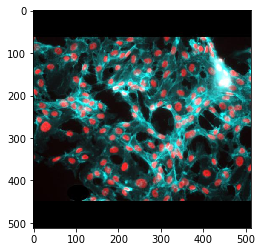

In [4]:
#Insert here the path of your local image ...
img_local = ij.io().open('IMAGES/image1.tif') 
img_web = ij.io().open('https://cildata.crbs.ucsd.edu/media/thumbnail_display/50647/50647_thumbnailx512.jpg')

print(type(img_local), "\nLocal Image:\n")
ij.py.show(img_local)
print(type(img_web), "\nWeb Image:\n")
ij.py.show(img_web)

Note that the previously opened images do not resulted as opened windows in ImageJ on the background.

In [5]:
print("Opened Windows:",ij.window().getOpenWindows()) #There are no open windows

Opened Windows: []


Images can be opened also with the *imread()* commnad from sky-kit image package. We can check later that also in this case the image is not displayed as opened window.

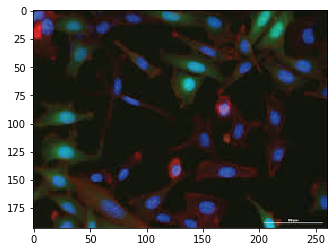

In [6]:
# open image from local disk
img_ski_local = io.imread('IMAGES/image2.jpeg')
ij.py.show(img_ski_local)

In [7]:
print("Opened Window:",ij.window().getOpenWindows()) 

Opened Window: []


The *Image()* command can be used to display picture local and web pictures. This option is used for the purpose of only displaying the picture and set the size. However, this function does not support .tif files.

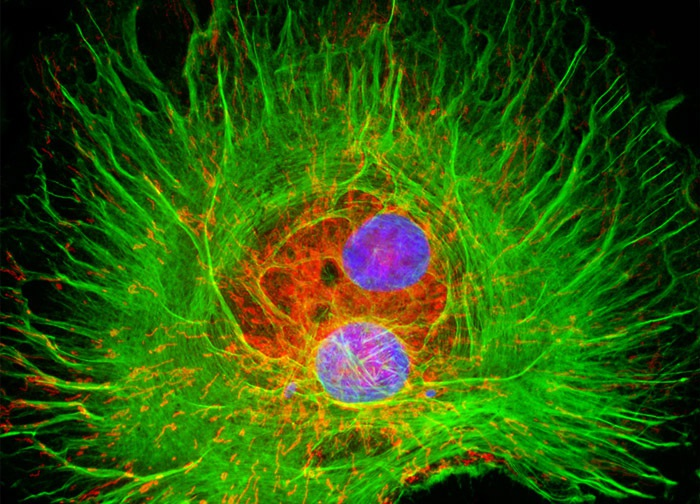

In [8]:
Image('https://www.microscopyu.com/assets/gallery-images/fluorescence_cv12.jpg', width = 320)

An alernative to open .tif images within the notebook but without the use of PyImageJ is to use the matplotlib package.

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

IMAGE:


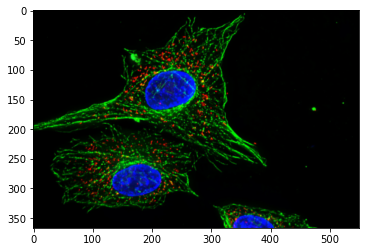

In [10]:
img_noise = mpimg.imread("IMAGES/image3.tif")
plt.imshow(img_noise, cmap = "gray")
print("IMAGE:")
plt.show()

***

### Run ImageJ Macro

The MACRO consists of a series of commands that can be automatically from ImageJ. The Macro must be entered as a string and then runned with the *ij.py.run_macro(macro)* function. The Macro is written with the IJmacro language.

The easiest way to open an image within ImageJ is to use a macro with the *open()* command and paste in it your own FILE PATH (example: "/Users/nicolascristini/IPAN-Project/IPAN/IMAGES/image1.tif"). To show the picture on the notebook we can select it with the *ij.py.active_image_plus()* command to activate the opened image and display it to screen. <br> **example:**

macro0 = """
open( >>>PASTE FILEPATH HERE<<< );
"""

ij.py.run_macro(macro0)

opened_image = ij.py.active_image_plus() 

ij.py.show(opened_image)

##### SAVE OUTPUT:
In the following example we run a macro that open the sample image "Blobs" and get Title and ID from the image. Those variables are retrieved from the result with the *.getOutput()* function and they must be specified at the beggining of the macro test with the *#@output String ...* command.

[java.lang.Enum.toString] [INFO] script:macro.ijm = [[ID, Title], [-3.0, blobs.gif]]


[INFO] script:macro.ijm = [[ID, Title], [-3.0, blobs.gif]]
Title =  blobs.gif 
ID =  -3.0


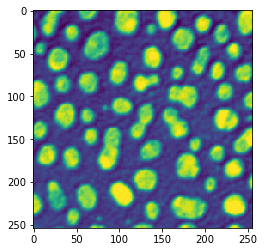

In [11]:
#MACRO: open an image, get the filename and get the Title. 
#GET Title and Id as output so that we can use it later
macro1 = """
//DEFINE IO
#@output String ID
#@output String Title

//MACRO CODE
run("Blobs (25K)");
Title = getTitle();
ID = getImageID();
"""

result1 = ij.py.run_macro(macro1)
Title = result1.getOutput('Title')
ID = result1.getOutput('ID')

print("Title = " , Title , "\n"
      "ID = ", ID)

blobs = ij.py.active_image_plus() #Activate the opened image and show it on the screen
ij.py.show(blobs)

The blobs image is the active from the previous line. Running another macro with the command *invert* will work on blobs. It is also possible to include scripts of other languages and run them with the *ij.py.run_script(language_extension, macro)* function by specifying the language_extension = 'ijm'.

ID:  -3.0


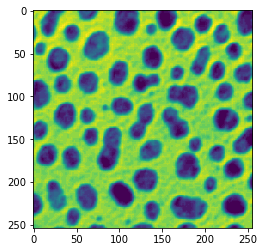

In [12]:
macro_invert = """
//DEFINE IO
#@output String ID

//MACRO CODE
run("Invert");
ID = getImageID()
"""
language_extension = 'ijm'
result_invert = ij.py.run_script(language_extension, macro_invert)

ID_inv = result_invert.getOutput('ID')
print("ID: ", ID_inv) 
ij.py.show(blobs)

To identify an image we can use both the Title and the ID. 
Note that: the ID is a unique negative integer for each images while, is always possible to rename an image. While there could contemporary be multiple opened images with the same title.

We can always check the windows open in the backgroung and select the one we want to work with. To do that we can use the *getOpenWindows()* function.

In [13]:
print(ij.window().getOpenWindows()) 

[blobs.gif, ID]


Pay attention that the firt two images uploaded with the *.io* are not included in the opened windows. Only the one opened whitin the macro (blobs) is showed in the list. If we want to run a macro an image, the image must be opened within the MACRO with the "open()" command.
For better use of the notenook, I use the *os.* package to get the current directory (where the notebook is saved) and use it to identify the absolute path of the IMAGES folder

In [14]:
cwd = os.getcwd() #Get current directory
IMAGES_dir = cwd + "/IMAGES"
print(IMAGES_dir)

/Users/nicolascristini/IPAN-Project/IPAN/IMAGES


By running the following macro we will open another image and make it the **active image**. By using the *args* dictionary we can select the input directiory. Further examples below in the notebook.

In [15]:
args_in = {
    'dir_in' : f"{IMAGES_dir}",
}

macro2 = """
//DEFINE IO
#@ Object dir_in
#@output String ID2

//MACRO CODE
image_path = dir_in + "/image3.tif"
open(image_path)
ID2 = getImageID()
"""

result2 = ij.py.run_macro(macro2, args_in)

ID2 = result2.getOutput('ID2')

ID:  -4.0


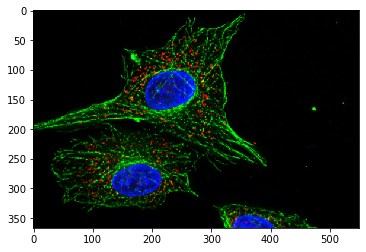

In [16]:
cells = ij.py.active_image_plus() #Activate the opened image and display it on screen
print("ID: ", ID2)
ij.py.show(cells)

The macro_invert will now have effect on the last activate image: cells.

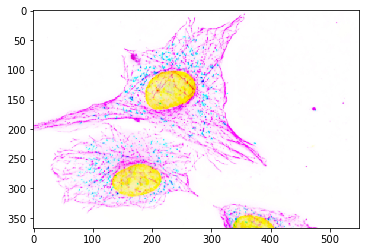

In [17]:
ij.py.run_macro(macro_invert) 
ij.py.show(cells)

In [18]:
#Check windows
windows = ij.window().getOpenWindows()
print(windows) #Open windows in the background

[blobs.gif, ID, ID2, image3.tif]


##### DEFINE INPUT:
With the following Macro we reactivate the "Blobs" image with the macro-command *SelectWindow()*. TO do this we can set as input the Title of the image previously saved chunk #6. We then run a pixel modifier command. Inside the Macro I included a checker string that gives me information about how the script is running.
The input variables are specified in a dictionary "args" and specified at the beginning of the Macro with the *#@ String ...* command.

In [19]:
print(Title)

blobs.gif


In [20]:
#The dictonaire include all the variables that we want to give in input.
args_title = {
    'img_title' : f"{Title}",
}

macro3 = """
//DEFINE IO
#@ String img_title
#@output Object checker

//MACRO CODE
selectWindow(img_title);
run("Salt and Pepper");
checker = "This is the title of the analysed image: " + img_title
"""

In [21]:
result3 = ij.py.run_macro(macro3, args_title)
print(result3.getOutput('checker'))

[INFO] script:macro.ijm = [[checker], [This is the title of the analysed image: blobs.gif]]
This is the title of the analysed image: blobs.gif


[java.lang.Enum.toString] [INFO] script:macro.ijm = [[checker], [This is the title of the analysed image: blobs.gif]]


At this point the blob.gif image after the "Salt and Pepper" command is open in the background as a window. We need to use the *WindowManager.getCurrentImage()* command to assign it to a variable and then display it to screen with the *ij.py.show()* command. Note that: the image below is the image resulted from the last macro on the **original** blob image.

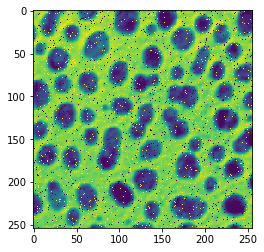

In [22]:
from scyjava import jimport
WindowManager = jimport('ij.WindowManager')
blobs_salt = WindowManager.getCurrentImage()    

ij.py.show(blobs_salt)  #Salt and pepper add some noise to the image

***
### Run a macro and save the resulting profile plot
We can use this method to run macro to modify the images and automatically save the results in the pre-selected result directory. The first step when we want to do processing and save results is to create a result_directory

In [23]:
#{OPTIONAL} We can create the directory form the Jupyter Notebook thanks to the os package
cwd = os.getcwd() #Get current directory
RESULTS_dir = cwd + "/RESULTS"

try:
    os.mkdir(RESULTS_dir)  
except FileExistsError:
    print("This directory already exist!")
    
print("The results will be saved in: ", RESULTS_dir)

The results will be saved in:  /Users/nicolascristini/IPAN-Project/IPAN/RESULTS


The following macro (1) open the sample image blobs; (2) get the hight and width of the image (3); draws a lines from the upper-left corner 0,0 to the bottom-right corner W,H; (4) computes the pixel intensity along the line with the *run("Plot Profile")* command; (5) save the plot. For this example we are going to use the sample image "AuPbSn 40".
This tool can be usefull to check the background and measure the pixel intensity of specific objects.

In [24]:
macro_profile = """
//DEFINE IO
#@ String dir_out

//MACRO CODE
run("AuPbSn 40");
H = getHeight();
W = getWidth();
makeLine(0, 0, W, H);
run("Plot Profile");

//SAVE
selectWindow("Plot of AuPbSn40");
saveAs(".png", dir_out + "/AuPbSn40_profile.png");
"""
args_out = {
    'dir_out' : f"{RESULTS_dir}",
}

#Run the macro
result_profile = ij.py.run_macro(macro_profile, args_out)

To display the diagonal line along with the pixel intensity has been computes, I am going to run an additional macro and the command *run("Add Selection...")* after drawing the line. The last argument of the *makeLine()* command represents the line width. 

In [25]:
macro_drawline = """
//DEFINE IO
#@ String dir_out

//MACRO CODE
run("AuPbSn 40");
H = getHeight();
W = getWidth();
makeLine(0, 0, W, H, 10);
run("Add Selection...");

//SAVE
saveAs(".png", dir_out + "/AuPbSn40_line.png");
"""

#Run the macro
result_profile = ij.py.run_macro(macro_drawline, args_out)


AuPbSn40 IMAGE:


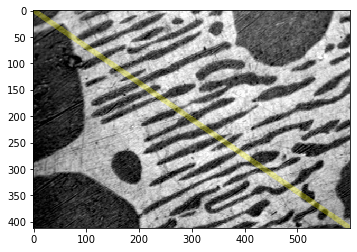


AuPbSn40 PROFILE IMAGE:


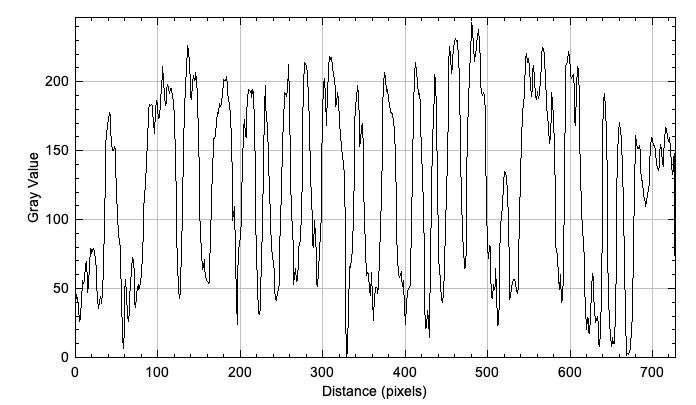

In [26]:
#Blobs image with the overlaid line
print("\nAuPbSn40 IMAGE:")
nAuPbSn40_line = ij.io().open(f"{RESULTS_dir}"+"/AuPbSn40_line.png") 
ij.py.show(nAuPbSn40_line,  cmap = 'gray') 

#Display the profile
print("\nAuPbSn40 PROFILE IMAGE:")
Image(f"{RESULTS_dir}"+"/AuPbSn40_profile.png")

### Image Processing

#### Add Noise
The following macro  open an image and perform a filter on it. The macro also computes the profile plot of the images before and after adding the noise.

In [27]:
macro_noise = """
//DEFINE IO
#@ Object dir_in
#@ String dir_out

//MACRO CODE
image_path = dir_in + "/image1.tif"
open(image_path)

//MAKE AND SAVE PROFILE ON ORIGINAL IMAGE
H = getHeight();
W = getWidth();
makeLine(0, 0, W, H);
run("Plot Profile");
selectWindow("Plot of image1");
saveAs(".png", dir_out + "/image1_original_profile.png");

//MAKE AND SAVE PROFILE ON NOISE IMAGE
selectWindow("image1.tif");
run("Add Noise");
rename("image1_noise")
saveAs(".tif", dir_in + "/image1_noise.tif");

makeLine(0, 0, W, H);
run("Plot Profile");

selectWindow("Plot of image1_noise");
saveAs(".png", dir_out + "/image1_noise_profile.png");
selectWindow("image1_noise.tif")
"""

args_IO = {
    'dir_in': f"{IMAGES_dir}",          
    'dir_out' : f"{RESULTS_dir}"  
}

In [28]:
#Run the macro
result_noise = ij.py.run_macro(macro_noise, args_IO)


ORIGINAL IMAGE:


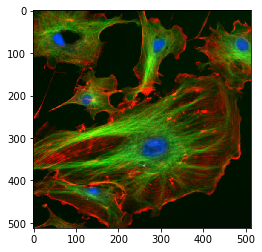


ORIGINAL IMAGE PROFILE:


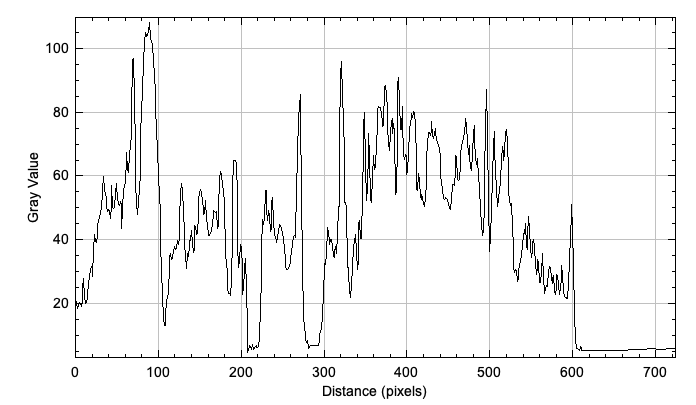

In [29]:
#Display the orginal image,imported as local image at the begginning of the notebook
print("\nORIGINAL IMAGE:")
ij.py.show(img_local) 

#Display the image prolile of the original image
print("\nORIGINAL IMAGE PROFILE:")
Image(f"{RESULTS_dir}"+"/image1_original_profile.png")

In the last line of the Macro I included the *selectWindow("image_test_noise")* command so that I could easily display the results of the macro to the screen by using the *WindowManager.getCurrentImage()*. 


NOISE IMAGE:


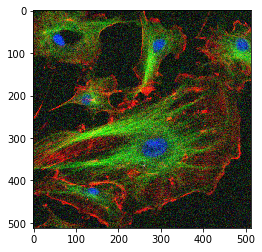


NOISE IMAGE PROFILE:


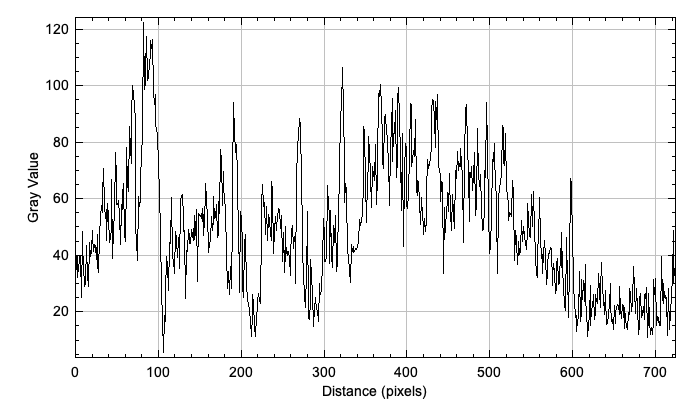

In [30]:
#Display the image resulted from the macro_noise
print("\nNOISE IMAGE:")
image_test_noise = WindowManager.getCurrentImage()
ij.py.show(image_test_noise)

#Display the image profile of the image after the adding some noise
print("\nNOISE IMAGE PROFILE:")
Image(f"{RESULTS_dir}"+"/image1_noise_profile.png")

By looking at the two Profile Plot we can see how the  processing commands have a direct effect on the pixel intensity of the image. Some of this processing steps are frequently used as components of the analytical pipeline. 

***
***
